## What questions are we solving here? 
- [ ] Number of Contributors dropping off
- [ ] Helping with new contributors
- [ ] Whose helping most
- [ ] Ratio of helpers to askers
- [ ] Chat responsive
- [ ] Do people have more questions at same time
- [ ] Contributor happiness


In [1]:
# Importing Libraries
import time
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
stops = set(stopwords.words("english"))

In [2]:
# start = time.time()
# print("Exporting Oppia Gitter Chat")
# !gitter-export-room id 561f4f4416b6c7089cb70f23 --token a5d7930a73eeaaed398112b1c18735db2da5a8cc > ../data/oppia_chat.json
# end = time.time()
# print("Elapsed Time: ",end - start)

In [3]:
chat = pd.read_json('../data/oppia_chat.json')

## Extract functions

In [4]:
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = text
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

def Extract_Username(column):
    temp_dict = dict(column)
    return temp_dict['username']

def Extract_Issue_Number(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict['number']
    else:
        return np.nan 
    
def Extract_URLs(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict[u'url']
    else:
        return np.nan
    
def Mentions(column):
    mention_lst = ', '.join(re.findall("@([a-z0-9_]+)", column, re.I))
    return mention_lst

In [5]:
chat.head()

,editedAt,fromUser,html,id,issues,mentions,meta,readBy,sent,status,text,unread,urls,v
0,NaN,"{'id': '57d3062040f3a6eec0647028', 'username':...",Congratulations community. oppia is accepted i...,5a81f100ce68c3bc7479a82e,[],[],[],40,2018-02-12T19:54:40.690Z,NaN,Congratulations community. oppia is accepted i...,False,[],1
1,NaN,"{'id': '588d8007d73408ce4f46b5eb', 'username':...","Congrats <span data-link-type=""mention"" data-s...",5a81f123b3c4a0d376141863,[],"[{'screenName': 'all', 'userIds': []}]",[],40,2018-02-12T19:55:15.764Z,NaN,Congrats @all,False,[],1
2,NaN,"{'id': '59c3730ed73408ce4f76b6f7', 'username':...",Hey where are the gsoc ideas for oppia?,5a820f667084124a346bdfeb,[],[],[],37,2018-02-12T22:04:22.773Z,NaN,Hey where are the gsoc ideas for oppia?,False,[],1
3,NaN,"{'id': '588d8007d73408ce4f46b5eb', 'username':...","<span data-link-type=""mention"" data-screen-nam...",5a820fa693be87284dabafb8,[],"[{'screenName': 'darthgera123', 'userId': '59c...",[],37,2018-02-12T22:05:26.766Z,NaN,@darthgera123 Follow the [link](https://github...,False,[{'url': 'https://github.com/oppia/oppia/wiki/...,1
4,NaN,"{'id': '59c3730ed73408ce4f76b6f7', 'username':...","<span data-link-type=""mention"" data-screen-nam...",5a820ff0e217167e2c76e227,[],"[{'screenName': 'WickedBrat', 'userId': '588d8...",[],37,2018-02-12T22:06:40.859Z,NaN,@WickedBrat what projects are you looking at ?,False,[],1


In [6]:
chat['username'] = chat['fromUser'].apply(Extract_Username)
chat['issue number'] = chat['issues'].apply(Extract_Issue_Number)
chat['url'] = chat['urls'].apply(Extract_URLs)
chat['mentions'] = chat['text'].apply(Mentions)
chat['mentions'].replace(to_replace ='', value= np.nan, inplace = True )
chat['sent'] = pd.to_datetime(chat['sent'])
chat['editedAt'] = pd.to_datetime(chat['editedAt'])
chat['question_marks'] = chat['text'].apply(lambda comment: comment.count('?'))
chat['Year'] = chat['sent'].dt.year
chat['Month'] = chat['sent'].dt.month
chat['Quarter'] = chat['sent'].dt.quarter
chat['DOW'] = chat['sent'].dt.dayofweek
chat['Day'] = chat['sent'].dt.day
chat['Hour'] = chat['sent'].dt.hour
chat['Date'] = chat['sent'].dt.date

cols_to_drop = ["fromUser","html","issues","meta","status","unread","urls"]
chat.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
chat['text'] = chat['text'].apply(cleanData, lowercase = True, remove_stops = True, stemming = True)

## Number of Contributors dropping off

In [9]:
chat2017 = chat[chat['Year'] >=2017]

# print "Number of active users from 2017:", chat2017.username.nunique()

ACTIVE_USERS_2017 = list(chat2017.username.unique())

chat2017[chat2017['username']=='shaz13'].Date.max()

datetime.date(2018, 2, 18)

In [10]:
from tqdm import tqdm
LAST_SEEN_USER = {}
FIST_SEEN_USER = {}
for user in tqdm(ACTIVE_USERS_2017):
    LAST_SEEN_USER[user] = chat2017[chat2017['username']== user].Date.max()
    FIST_SEEN_USER[user] = chat2017[chat2017['username']== user].Date.min() 

100%|██████████| 209/209 [00:00<00:00, 242.76it/s]


In [11]:
chat2017.Date.max()

datetime.date(2018, 3, 2)

In [13]:
INACTIVE  = {}
for user in tqdm(LAST_SEEN_USER):
    INACTIVE[user] = (chat2017.Date.max() - LAST_SEEN_USER[user]).days

100%|██████████| 209/209 [00:00<00:00, 1356.87it/s]


In [14]:
INACTIVE = pd.DataFrame({'user': INACTIVE.keys(), 'days' : INACTIVE.values()}).sort_values(by='days', ascending=False)

TypeError: '<' not supported between instances of 'dict_values' and 'dict_values'

In [16]:
INACTIVE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
days,209.0,201.325359,143.086275,0.0,54.0,218.0,353.0,424.0


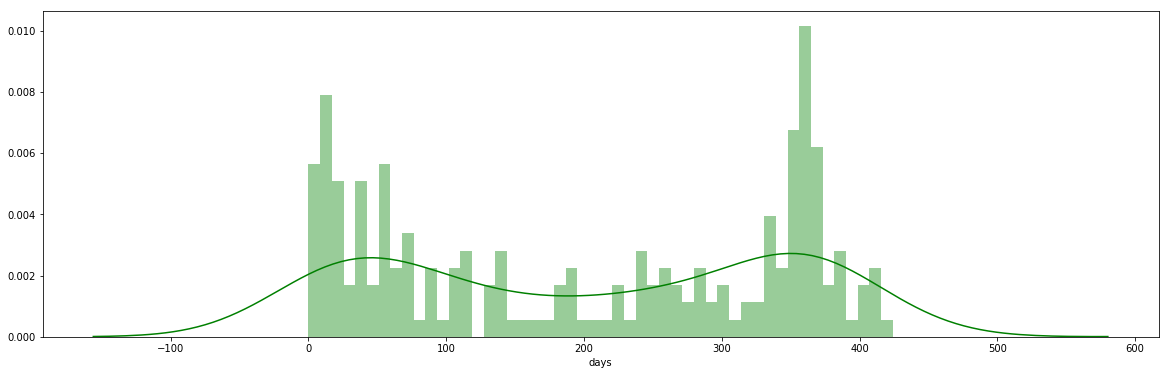

In [17]:
plt.figure(figsize=(20,6))
sns.distplot(INACTIVE.days, bins=50, color='g')

In [18]:
INACTIVE[INACTIVE.days>218.000000].shape
INACTIVE_USERS = INACTIVE[INACTIVE.days>218.000000].user

In [19]:
NO_USERS_DROPPED_OFF = len(INACTIVE.user) - len(INACTIVE_USERS)
print NO_USERS_DROPPED_OFF, "dropped out of", len(INACTIVE.user) , "users"

105 dropped out of 209 users


## Helping with new contributors
- [ ] Whose helping most
- [ ] Ratio of helpers to askers
- [ ] Chat responsive

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from tqdm import tqdm
tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,4), min_df=5)
tfidfdata = tfidfvec.fit_transform(chat2017['text'])
feature_names = tfidfvec.get_feature_names()
print "Number of Features:", len(feature_names)
# create dataframe for features
tfidf_df = pd.DataFrame(tfidfdata.todense())
tfidf_df.columns = feature_names
X = tfidf_df

Number of Features: 2133


In [21]:
X.head()

,10,10 min,100,11,12,13,15,15th,16,1604,...,youll need,your,your use,your welcom,youv,youv follow,yup,zhengxit,zip,zip file
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
pd.DataFrame(feature_names).transpose()

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,10,10 min,100,11,12,13,15,15th,16,1604,...,youll need,your,your use,your welcom,youv,youv follow,yup,zhengxit,zip,zip file


In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X=tfidf_df)
cluster = pd.DataFrame(chat2017[['text','mentions','username','question_marks']])
cluster['cluster'] = kmeans.predict(tfidf_df)
cluster['text']  = chat2017['text']

In [24]:
cluster.cluster.value_counts()

0    6158
1     302
Name: cluster, dtype: int64

In [27]:
def IfZero(X):
    if X==0:
        return 0
    else:
        return 1

In [28]:
cluster['question_marks_bin'] = cluster.question_marks.apply(IfZero)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print "Accuracy:", accuracy_score(cluster.question_marks_bin, cluster.cluster)
print classification_report(cluster.question_marks_bin, cluster.cluster)
print confusion_matrix(cluster.question_marks_bin, cluster.cluster)

Accuracy: 0.7291021671826625
             precision    recall  f1-score   support

          0       0.76      0.94      0.84      5000
          1       0.02      0.00      0.01      1460

avg / total       0.60      0.73      0.65      6460

[[4704  296]
 [1454    6]]


In [44]:
y= cluster.question_marks_bin

In [68]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,GaussianNB
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = MultinomialNB()
# Cross-validation Score with ShuffleSplit
from sklearn.model_selection import ShuffleSplit, cross_val_score, KFold, StratifiedKFold, StratifiedShuffleSplit
shuffle_split = ShuffleSplit(test_size=.4, train_size=.6, n_splits=5)
scores = cross_val_score(clf, X, y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.77399381 0.78366873 0.77321981 0.77128483 0.78328173]
Average cross-validation score: 0.78


## Whose Helping the most

In [163]:
pd.DataFrame(data= cluster.username.value_counts()).reset_index()

,index,username
0,seanlip,1216
1,shaz13,729
2,Arunabh98,374
3,jaredsilver,322
4,ashish3805,297
5,1995YogeshSharma,271
6,pranavsid98,233
7,wxyxinyu,200
8,saeedjassani,140
9,himanshu-dixit,138


In [78]:
cluster[cluster.question_marks_bin == 0].username.value_counts()[:10]

seanlip             893
shaz13              610
Arunabh98           315
ashish3805          250
jaredsilver         225
1995YogeshSharma    211
wxyxinyu            160
pranavsid98         155
WickedBrat          120
andromfins          109
Name: username, dtype: int64

In [96]:
QuestUsers = pd.DataFrame(cluster[cluster.question_marks_bin == 1].username.value_counts()).reset_index()
HelpFulUsers = pd.DataFrame(cluster[cluster.question_marks_bin == 0].username.value_counts()).reset_index()

In [151]:
cluster.groupby(by='username').mean().sort_values(by='question_marks_bin', ascending=False).describe()

,question_marks,cluster,question_marks_bin
count,209.000000,209.000000,209.00000
mean,0.296863,0.093236,0.26985
std,0.331561,0.153428,0.28913
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.206897,0.000000,0.18750
75%,0.500000,0.125000,0.40000
max,2.000000,0.666667,1.00000


In [153]:
cluster.groupby(by='username').mean().sort_values(by='question_marks_bin', ascending=False)

,question_marks,cluster,question_marks_bin
username,,,
Utsav-k,2.000000,0.000000,1.000000
DipanshKhandelwal,1.000000,0.000000,1.000000
ajayns,1.000000,0.000000,1.000000
razat249,1.000000,0.000000,1.000000
SShatun,1.500000,0.500000,1.000000
nitkul,1.000000,0.000000,1.000000
PokerFace8,1.500000,0.000000,1.000000
anandgoswami,1.000000,0.000000,1.000000
kartik-25,1.000000,0.000000,1.000000


In [133]:
dict(cluster[cluster.username == 'shaz13'].question_marks_bin.value_counts())[1]

119

In [ ]:
shaz